In [21]:
import pandas as pd

# Loading the dataset
file_path = 'cannabisregistry.csv'
data = pd.read_csv('cannabisregistry.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   _id                         206 non-null    int64  
 1   id_name_first               187 non-null    object 
 2   id_name_last                206 non-null    object 
 3   id_full_name                202 non-null    object 
 4   app_license_category        206 non-null    object 
 5   app_license_no              206 non-null    object 
 6   app_business_name           176 non-null    object 
 7   app_dba_name                120 non-null    object 
 8   app_license_status          206 non-null    object 
 9   lt_license_type             206 non-null    object 
 10  equity_program_designation  101 non-null    object 
 11  facility_address            204 non-null    object 
 12  facility_zip_code           206 non-null    int64  
 13  longitude                   203 non

In [6]:
import requests
import pandas as pd

# List of census tracts to filter
census_tracts_list = [
    '25025080601', '25025010403', '25025070700', '25025010300', '25025981100',
    '25025120201', '25025980300', '25025010404', '25025010405', '25025080100',
    '25025120301', '25025071101', '25025091300', '25025010500', '25025110105',
    '25025010206', '25025081301', '25025081302', '25025070502', '25025082100',
    '25025010600', '25025070600', '25025080300', '25025080401', '25025080500',
    '25025080801', '25025080900', '25025081400', '25025081500', '25025081700',
    '25025081800', '25025081900', '25025082000', '25025090100', '25025090200',
    '25025090300', '25025090400', '25025090600', '25025090700', '25025091400',
    '25025092400', '25025070902', '25025070802', '25025070801', '25025070901'
]

# Function to get census tract using the Census Geocoder API
def get_census_tract(latitude, longitude):
    base_url = "https://geocoding.geo.census.gov/geocoder/geographies/coordinates"
    params = {
        "x": longitude,
        "y": latitude,
        "benchmark": "Public_AR_Current",
        "vintage": "Current_Current",
        "format": "json"
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        try:
            # Extract GEOID20 from the response
            geoid = data['result']['geographies']['Census Tracts'][0]['GEOID']
            return geoid
        except (KeyError, IndexError):
            return None
    else:
        return None

# Load your dataset
data_file = "cannabisregistry.csv"  # Replace with the path to your dataset
license_data = pd.read_csv(data_file)

# Add a new column for GEOID
license_data['geoid20'] = license_data.apply(
    lambda row: get_census_tract(row['latitude'], row['longitude']), axis=1
)

# Filter rows with matching census tracts
filtered_data = license_data[license_data['geoid20'].isin(census_tracts_list)]

# Save or display the filtered data
print(filtered_data[['geoid20', 'latitude', 'longitude']])
filtered_data.to_csv("filtered_data.csv", index=False)


         geoid20   latitude  longitude
3    25025110105  42.298707 -71.114122
9    25025080401  42.331400 -71.082651
10   25025090700  42.323590 -71.053971
13   25025080100  42.327260 -71.066487
19   25025070802  42.341190 -71.080601
26   25025090700  42.323243 -71.062975
27   25025080900  42.333208 -71.102462
32   25025070902  42.337692 -71.075747
33   25025080900  42.333210 -71.102461
37   25025070600  42.342430 -71.074971
48   25025070700  42.346320 -71.075099
52   25025090200  42.309671 -71.082200
63   25025080801  42.331920 -71.096631
64   25025080601  42.329410 -71.084921
65   25025080300  42.328384 -71.081638
68   25025092400  42.295340 -71.088101
69   25025081301  42.321585 -71.098717
72   25025010206  42.347490 -71.097989
76   25025081400  42.328030 -71.098501
78   25025090700  42.323590 -71.053971
83   25025090400  42.320940 -71.072670
88   25025080100  42.329372 -71.074802
93   25025082000  42.310840 -71.081841
94   25025080100  42.330796 -71.065723
97   25025070902  42.3377

In [7]:
!pip install folium


In [8]:
import folium

# Create a base map centered around the region
m = folium.Map(location=[42.33, -71.08], zoom_start=13)

# Add points to the map
for _, row in filtered_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Census Tract: {row['geoid20']}"
    ).add_to(m)

# Save the map to an HTML file or display
m.save("census_tract_map.html")
m


/var/folders/p1/2ml0fv9x7x79s1nnddt1_10h0000gn/T/ipykernel_3898/3478547412.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=license_category_counts.index, y=license_category_counts.values, palette="viridis")


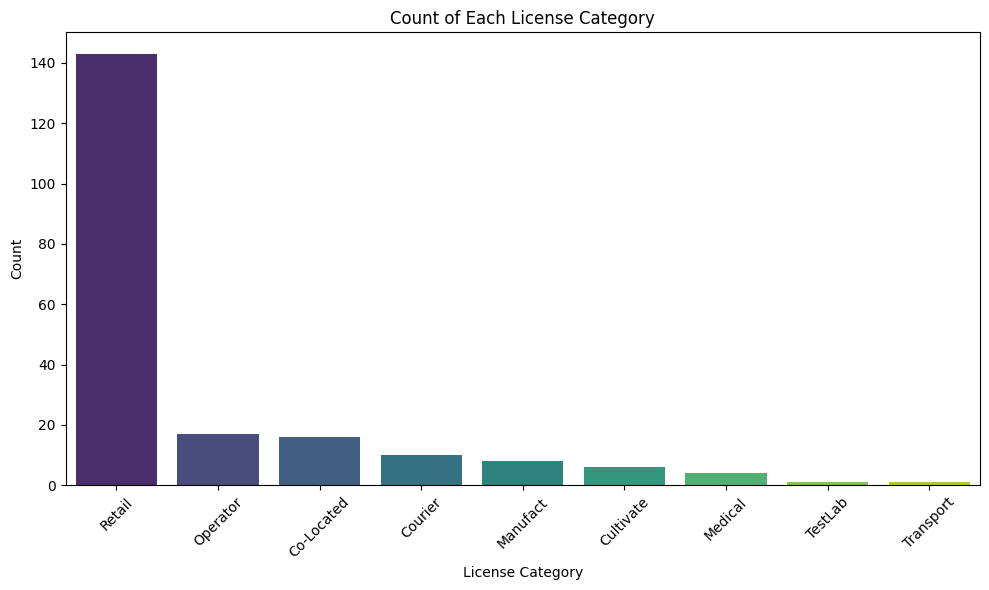

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of app_license_category
license_category_counts = license_data['app_license_category'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=license_category_counts.index, y=license_category_counts.values, palette="viridis")
plt.title('Count of Each License Category')
plt.xlabel('License Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Code:
The code counts the occurrences of each app_license_category and visualizes the counts using a bar chart.

Plot Explanation:
The bar chart shows the frequency distribution of license categories, making it easy to identify the most and least common categories.

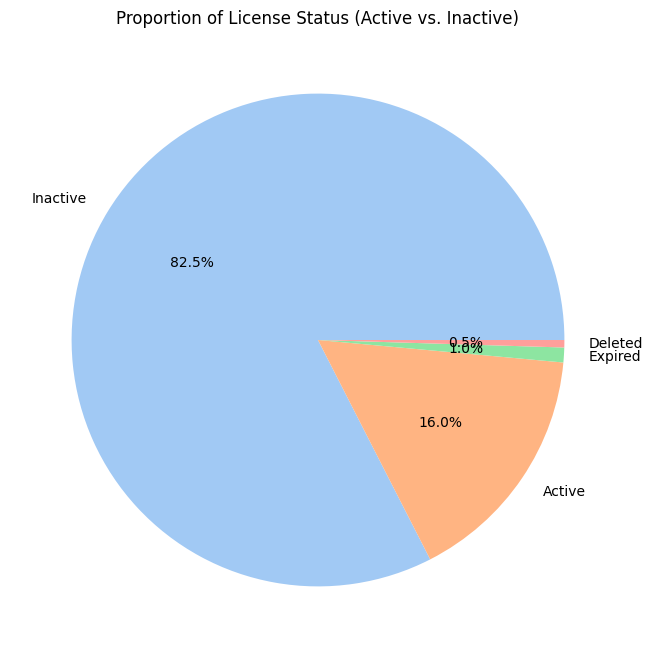

In [10]:
# Proportions of app_license_status
license_status_counts = license_data['app_license_status'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(license_status_counts, labels=license_status_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of License Status (Active vs. Inactive)')
plt.show()


Code:
The code calculates proportions of app_license_status (e.g., active vs. inactive) and displays them as a pie chart.

Plot Explanation:
The pie chart illustrates the share of active and inactive licenses, helping to understand the operational status distribution.

/var/folders/p1/2ml0fv9x7x79s1nnddt1_10h0000gn/T/ipykernel_3898/898960864.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_businesses.index, x=top_businesses.values, palette="mako")


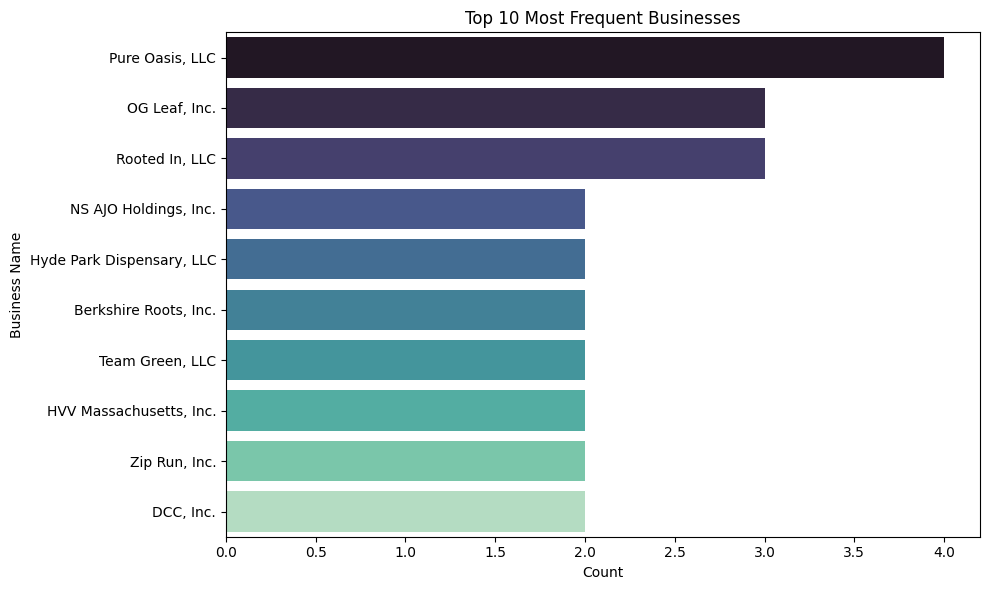

In [11]:
# Top 10 most frequent businesses
top_businesses = license_data['app_business_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=top_businesses.index, x=top_businesses.values, palette="mako")
plt.title('Top 10 Most Frequent Businesses')
plt.xlabel('Count')
plt.ylabel('Business Name')
plt.tight_layout()
plt.show()


Plot Explanation:
The horizontal bar chart shows the frequency of the top 10 most frequent businesses in the dataset.
Bars represent the number of occurrences of each business, with the longest bar representing the most frequent business.
This chart helps identify the most common businesses in the dataset, allowing to see which businesses have the highest presence.

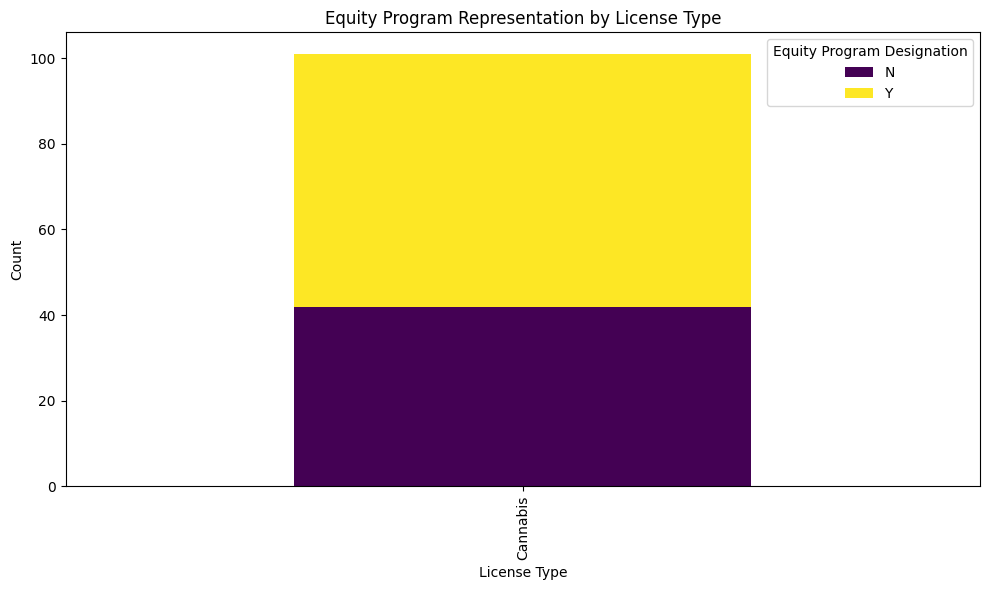

In [14]:
# Grouped data
equity_license_data = license_data.groupby(['lt_license_type', 'equity_program_designation']).size().unstack()

# Plot
equity_license_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Equity Program Representation by License Type')
plt.xlabel('License Type')
plt.ylabel('Count')
plt.legend(title='Equity Program Designation')
plt.tight_layout()
plt.show()


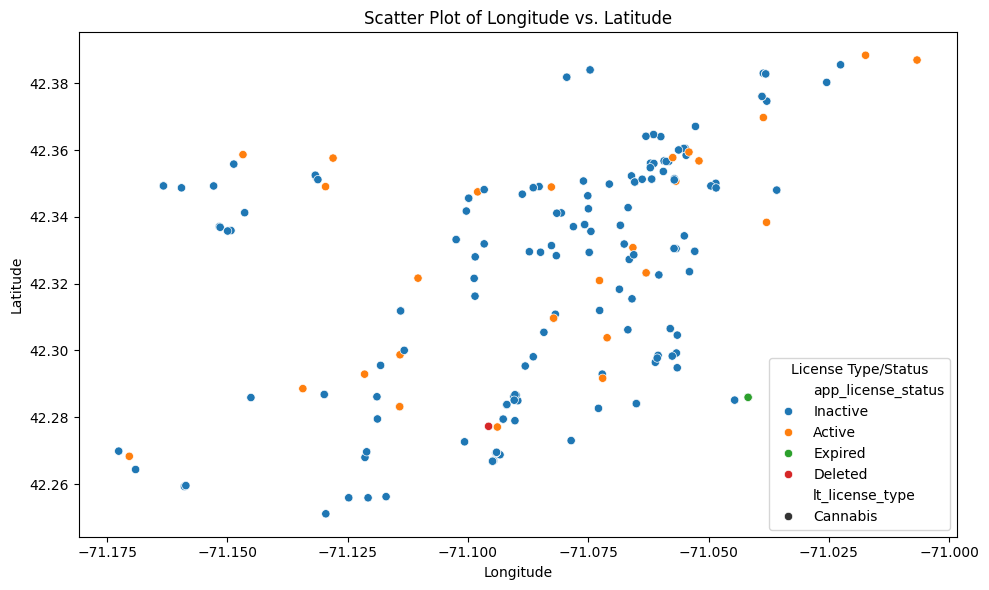

In [19]:
# Scatter Plot for Longitude vs. Latitude
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=license_data['longitude'],
    y=license_data['latitude'],
    hue=license_data['app_license_status'],
    style=license_data['lt_license_type'],
    palette='tab10'
)
plt.title('Scatter Plot of Longitude vs. Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='License Type/Status')
plt.tight_layout()
plt.show()


Plot Explanation:
The x-axis represents longitude, and the y-axis represents latitude.
The color of the points indicates the app_license_status (active vs. inactive businesses).
This scatter plot helps visualize the spatial distribution of businesses and whether there are any patterns in their geographical locations based on license status.